# Modélisation – Random Forest (Simple)
- RandomForest baseline
- Petit GridSearch
- Matrice de confusion
- Classification report
- Courbe d’apprentissage
- Export submission Kaggle (0/1)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report


In [2]:
train = pd.read_csv('../data/train_preprocessed_simple.csv')
test = pd.read_csv('../data/test_preprocessed_simple.csv')

target = 'target_is_fraud'
id_col = 'customer_id'

X = train.drop(columns=[target, id_col])
y = train[target]
X_test = test.drop(columns=[id_col])


In [3]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [4]:
rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [1, 10]
}

grid = GridSearchCV(rf, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
print('Best params:', grid.best_params_)


Best params: {'max_depth': None, 'n_estimators': 200}


In [5]:
y_pred = best_model.predict(X_val)

print('Confusion Matrix:')
print(confusion_matrix(y_val, y_pred))

print('\nClassification Report:')
print(classification_report(y_val, y_pred))


Confusion Matrix:
[[30999    16]
 [   96   889]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     31015
           1       0.98      0.90      0.94       985

    accuracy                           1.00     32000
   macro avg       0.99      0.95      0.97     32000
weighted avg       1.00      1.00      1.00     32000



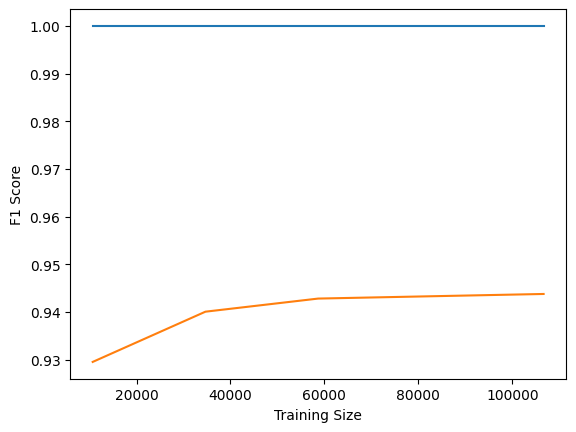

In [6]:
train_sizes, train_scores, val_scores = learning_curve(
    best_model, X, y, cv=3, scoring='f1', n_jobs=-1
)

plt.plot(train_sizes, train_scores.mean(axis=1))
plt.plot(train_sizes, val_scores.mean(axis=1))
plt.xlabel('Training Size')
plt.ylabel('F1 Score')
plt.show()


In [13]:
test_predictions

array([0, 0, 0, ..., 0, 0, 0])

In [12]:
# Prédiction binaire 0/1 pour Kaggle
test_predictions = best_model.predict(X_test)

submission = pd.DataFrame({
    "customer_id": test_df["customer_id"],
    "target_is_fraud": test_predictions
})

submission.to_csv('../submissions/submission_rf_simple.csv', index=False)
print('Submission exportée.')


Submission exportée.


In [11]:
test_df = pd.read_csv('../data/test.csv')